In [2]:
import requests
import time
import json
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists

In [3]:
data_dir = "../datasets/"

In [4]:
sp_list = []
stock_dict = {}

#grab a list of stocks
with open(data_dir + "s&p_500.txt", "r") as sp500:
  for line in sp500:
    stripped_line = line.strip()
    sp_list.append(stripped_line)

In [69]:
#grab the stock data from the API of the list of stocks
for stock in sp_list:
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=' + stock + '&interval=30min&apikey=ZGZ4OJNI93JTJNTJ&outputsize=full'
    r = requests.get(url)
    data = r.json()
    keys = data.keys()
    stock_dict = {}
    print(stock)
    if len(keys) > 1:
        prices = data[list(keys)[1]]
        for key in prices.keys():
            prices[key] = prices[key]['1. open']
        stock_dict[stock] = prices
        with open('../datasets/stock_time_series/' + (stock) + 'stock_data.txt', 'w') as data_file:
            data_file.write(json.dumps(stock_dict))
    time.sleep(12.1)

A


In [79]:
#stock for A to work as our sample
sample_stock = sp_list[0]
stock_dict = {}

#starting keys
with open(data_dir + 'stock_time_series/' + sample_stock + 'stock_data.txt') as json_file:
    data = json.load(json_file)
    starting_keys = list(data[sample_stock].keys())
for stock in sp_list:
    if exists(data_dir + 'stock_time_series/' + stock + 'stock_data.txt'):
        with open(data_dir + 'stock_time_series/' + stock + 'stock_data.txt') as json_file:
            data = json.load(json_file)
            stock_dict[stock] = data[stock]

#iteratively shrink the time series to a size that can be aligned
for i in range(3):
    for stock in sp_list:
        if exists(data_dir + 'stock_time_series/' + stock + 'stock_data.txt'):
            with open(data_dir + 'stock_time_series/' + stock + 'stock_data.txt') as json_file:
                data = json.load(json_file)
            data = stock_dict
            working_keys = list(data[stock].keys())
            for key in working_keys:
                if key not in starting_keys:
                    del data[stock][key]
                    #working_keys.remove(key)
            for key in starting_keys:
                if key not in list(data[stock].keys()):
                    starting_keys.remove(key)
            print(len(list(stock_dict[stock].keys())))
    

465
450
394
417
410
388
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
383
383
383
383
383
383
383
383
383
381
381
381
381
381
381
381
381
381
381
381
381
381
381
381
381
381
381
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
378
377
377
377
377
377
377
377
377
377
377
377
377
377
377
377
377
377
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
374
374
374
374
374
374
374
374
374
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373
373


In [80]:
#write the aligned data to json files
for stock in sp_list:
    print(stock)
    if exists(data_dir + 'stock_time_series/' + stock + 'stock_data.txt'):
        print(stock + "done")
        with open(data_dir + '/aligned_time_series/' + stock + 'aligned_data.txt', 'w') as json_file:
            dict = {stock : data[stock]}
            json.dump(dict, json_file)

A
Adone
AAL
AALdone
AAP
AAPdone
AAPL
AAPLdone
ABBV
ABBVdone
ABC
ABCdone
ABMD
ABMDdone
ABT
ABTdone
ACN
ACNdone
ADBE
ADBEdone
ADI
ADIdone
ADM
ADMdone
ADP
ADPdone
ADSK
ADSKdone
AEE
AEEdone
AEP
AEPdone
AES
AESdone
AFL
AFLdone
AIG
AIGdone
AIZ
AIZdone
AJG
AJGdone
AKAM
AKAMdone
ALB
ALBdone
ALGN
ALGNdone
ALK
ALKdone
ALL
ALLdone
ALLE
ALLEdone
AMAT
AMATdone
AMCR
AMCRdone
AMD
AMDdone
AME
AMEdone
AMGN
AMGNdone
AMP
AMPdone
AMT
AMTdone
AMZN
AMZNdone
ANET
ANETdone
ANSS
ANSSdone
ANTM
ANTMdone
AON
AONdone
AOS
AOSdone
APA
APAdone
APD
APDdone
APH
APHdone
APTV
APTVdone
ARE
AREdone
ATO
ATOdone
ATVI
ATVIdone
AVB
AVBdone
AVGO
AVGOdone
AVY
AVYdone
AWK
AWKdone
AXP
AXPdone
AZO
AZOdone
BA
BAdone
BAC
BACdone
BAX
BAXdone
BBWI
BBWIdone
BBY
BBYdone
BDX
BDXdone
BEN
BENdone
BIIB
BIIBdone
BIO
BIOdone
BK
BKdone
BKNG
BKNGdone
BKR
BKRdone
BLK
BLKdone
BLL
BLLdone
BMY
BMYdone
BR
BRdone
BRKB
BRO
BROdone
BSX
BSXdone
BWA
BWAdone
BXP
BXPdone
C
Cdone
CAG
CAGdone
CAH
CAHdone
CARR
CARRdone
CAT
CATdone
CB
CBdone
CBOE
CBOEdone
CBRE


In [12]:
with open(data_dir + 'spearman_coefficients.csv', 'w') as csv_file:
    csv_file.write('stock1' + ',' + 'stock2' + ',' + 'spearman' + ',' + 'pval' + '\n')
    for stock1 in sp_list:
        for stock2 in sp_list:
            if exists(data_dir + 'aligned_time_series/' + stock1 + 'aligned_data.txt') and exists(data_dir + 'aligned_time_series/' + stock2 + 'aligned_data.txt'):
                stock1_vector = []
                stock2_vector = []
                with  open(data_dir + 'aligned_time_series/' + stock1 + 'aligned_data.txt') as json_file:
                    data = json.load(json_file)
                    for key in data[stock1].keys():
                        stock1_vector.append(data[stock1][key])
                with  open(data_dir + 'aligned_time_series/' + stock2 + 'aligned_data.txt') as json_file:
                    data = json.load(json_file)
                    for key in data[stock2].keys():
                        stock2_vector.append(data[stock2][key])
                rho, pval = spearmanr(stock1_vector, stock2_vector)
                csv_file.write(str(stock1) + ',' + str(stock2) + ',' + str(rho) + ',' + str(pval) + '\n')


0.39104746022188075


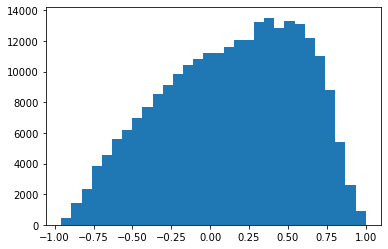

In [18]:
#look at the distibution of coefficients
df = pd.read_csv(data_dir + 'spearman_coefficients.csv' )
plt.figure()
plt.hist(df['spearman'],bins=30)
print(np.mean(abs(df['spearman'])))
plt.savefig('../figures/coefficient_distribution.png')